<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/LogisticRegression_PracticeLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Practice Lab: Logistic Regression

This lab will help you **practice logistic regression** concepts from Andrew Ng's Machine Learning course.

### You will practice:
1. Sigmoid function implementation and visualization  
2. Logistic regression hypothesis and cost function  
3. Gradient descent updates  
4. Decision boundary visualization  
5. Model evaluation (accuracy)  
6. Feature scaling and vectorization  
7. Regularization (overview + implementation exercise)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


## 1. Sigmoid Function

The logistic regression hypothesis uses the **sigmoid function**:  
$ \sigma(z) = \frac{1}{1 + e^{-z}} $

✅ **Exercise:** Implement `sigmoid(z)` and test on values [-10, 0, 10].


In [3]:
def sigmoid(z):
  return 1/( 1 + np.exp(-z) )

x = np.array([-10, 0, 10])
print("Sigmoid", sigmoid(x))

Sigmoid [4.53978687e-05 5.00000000e-01 9.99954602e-01]



## 2. Logistic Regression Hypothesis & Cost

**Hypothesis:**  
$ h(x) = \sigma(w^T x + b) $

**Loss for one example:**  
$ L = - \big( y \log(h(x)) + (1-y)\log(1-h(x)) \big) $

**Cost function:**  
$ J(w,b) = -\frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(h(x^{(i)})) + (1-y^{(i)}) \log(1-h(x^{(i)})) \Big] $

✅ **Exercise:** Implement the cost function `compute_cost_logistic(X, y, w, b)`.


In [5]:
def compute_cost_logistic(X, y, w, b):
  m = X.shape[0]
  z = X @ w + b
  h = sigmoid(z)
  cost = -( 1/m ) * np.sum((y*np.log(h)) - ((1-y)*(np.log(1-h))))
  return cost

X_t = np.array([[0.2, 0.4], [0.5, 0.9], [0.8, 0.1]])
y_t = np.array([0,1,0])
w_t = np.array([0.1, -0.2])
b_t = 0.5
print("Cost =", compute_cost_logistic(X_t, y_t, w_t, b_t))

Cost = -0.4746123093152604



## 3. Gradient Descent for Logistic Regression

**Gradients:**

$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m \big( h(x^{(i)}) - y^{(i)} \big) x^{(i)} $

$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \big( h(x^{(i)}) - y^{(i)} \big) $


✅ **Exercise:** Implement `compute_gradient_logistic` and `gradient_descent_logistic`.


In [22]:
def compute_gradient_logistic(X, y, w, b):
  m,n = X.shape
  z = X @ w + b
  h = sigmoid(z)
  err = h - y
  dj_dw = ( X.T @ err ) / m
  dj_db = np.sum(err) / m
  return dj_dw , dj_db

def gradient_descent_logistic(X, y, w, b, alpha , num_iter):
  cost_hist = []
  for i in range(num_iter):
    dj_dw ,dj_db = compute_gradient_logistic(X, y, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db
    if i % 100 == 0:
      cost = compute_cost_logistic(X, y, w, b)
      cost_hist.append(cost)
  return w, b, cost_hist

# Test
w_t = np.zeros(X_t.shape[1])
b_t = 0
w_final, b_final, hist = gradient_descent_logistic(X_t, y_t, w_t, b_t, alpha=0.1, num_iter=1000)
print("w:", w_final, " b:", b_final)



w: [-0.09332217  5.51141258]  b: -3.5029920620660726



## 4. Decision Boundary Visualization

For 2D data, the decision boundary is defined by:  

$ w^T x + b = 0 $  

Expanding for two features $x_1$ and $x_2$:  

$ w_1 x_1 + w_2 x_2 + b = 0 $  

We can solve for $x_2$:  

$ x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} $


✅ **Exercise:** Train logistic regression on synthetic data and plot boundary.


[np.float64(-0.00024269863690679628), np.float64(-0.010177929792897509), np.float64(-0.013059252322273812), np.float64(-0.01422922450440799), np.float64(-0.014787847509816932), np.float64(-0.015074366097587997), np.float64(-0.01522750463915589), np.float64(-0.015311892965177792), np.float64(-0.015359745341177318), np.float64(-0.015387752644070794), np.float64(-0.015404785375365193), np.float64(-0.015415650945144927), np.float64(-0.015422999673507163), np.float64(-0.015428316083651408), np.float64(-0.0154324441626246), np.float64(-0.015435870312003075), np.float64(-0.015438878242785005), np.float64(-0.015441635140138967), np.float64(-0.0154442403496455), np.float64(-0.015446753291884989)]


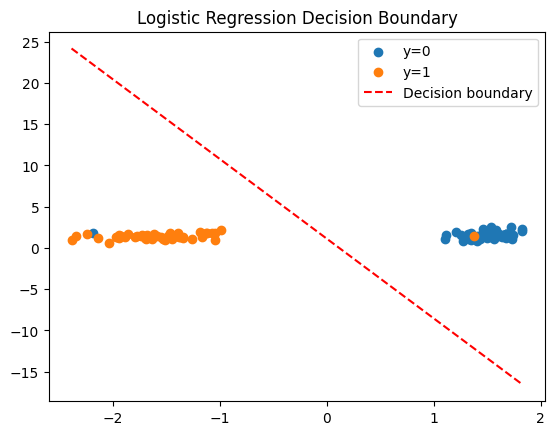

In [23]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
 n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=1)

w = np.zeros(X.shape[1])
b = 0
w_fit, b_fit, cost = gradient_descent_logistic(X, y, w, b, alpha =  0.1, num_iter = 2000)
print(cost)

plt.scatter(X[y==0,0], X[y==0,1], label="y=0")
plt.scatter(X[y==1,0], X[y==1,1], label="y=1")

x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_vals = -(w_fit[0]*x_vals + b_fit)/w_fit[1]
plt.plot(x_vals, y_vals, 'r--', label="Decision boundary")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()


## 5. Model Evaluation

$ \text{Accuracy} = \dfrac{\text{Number of correct predictions}}{\text{Total number of predictions}} $


✅ **Exercise:** Implement accuracy function.


In [11]:


def predict(X, w, b, threshold=0.5):
    return (sigmoid(X @ w + b) >= threshold).astype(int)

def accuracy(X, y, w, b):
    preds = predict(X, w, b)
    return np.mean(preds == y)

print("Train Accuracy:", accuracy(X, y, w_fit, b_fit))

Train Accuracy: 0.98



## 6. Feature Scaling & Vectorization

- Scaling helps convergence.  
- Vectorization speeds up training.

✅ **Exercise:** Scale X and retrain.


In [14]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
w = np.zeros(X.shape[1])
b = 0
w_fit, b_fit, _ = gradient_descent_logistic(X_norm, y, w, b, alpha=0.1, num_iter=2000)
print("Accuracy after scaling:", accuracy(X_norm, y, w_fit, b_fit))



Accuracy after scaling: 0.98



## 7. Regularization (Bonus)

**Regularized Cost Function:**  

$ J(w,b) = \text{Logistic Loss} + \dfrac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $  

where the logistic loss is:  

$ -\dfrac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(h(x^{(i)})) + (1-y^{(i)}) \log(1-h(x^{(i)})) \Big] $


✅ **Exercise:** Modify cost and gradient functions to include L2 penalty.


In [16]:
lambda_ = 0.4
m = X.shape[0]
reg_cost = compute_cost_logistic(X, y, w, b) + (lambda_ / (2*m)) * np.sum(np.square(w))
print(reg_cost)

0.004327629549526257



## ✅ Takeaways

- Logistic regression outputs **probabilities** using sigmoid.  
- Cost function: **log-loss**, convex and well-suited for classification.  
- Gradient descent optimizes weights iteratively.  
- Decision boundary is linear in features.  
- Feature mapping + regularization improve performance.  
- Scaling accelerates convergence.

Now, experiment with different datasets, learning rates, and λ values! 🚀
